In [155]:
# Regression metrics :- 
# 1) MAE
# 2) MSE
# 3) RMSE
# 4) R2-Score
# 5) Adjusted R2-Score
# definition of above with their use case and Pros & cons

In [156]:
import pandas as pd

In [157]:
df = pd.read_csv('placement.csv')
df.head(5)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [158]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Package in lakhs')

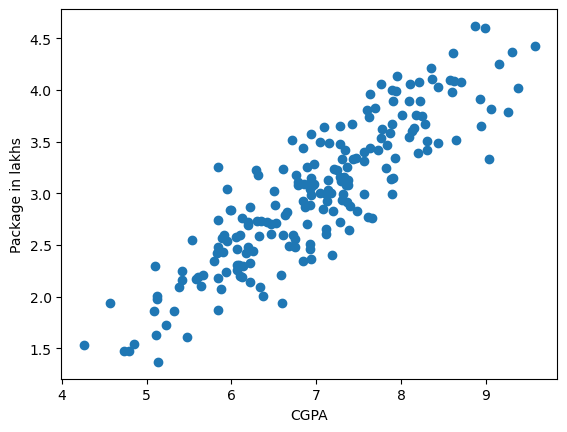

In [159]:
plt.scatter(x = df['cgpa'], y = df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package in lakhs')

In [160]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:1]
y = df.iloc[:,-1]
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2 , random_state=2)

In [161]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [162]:
lr.fit(X_train,y_train)

LinearRegression()

In [163]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [164]:
lr.predict(X_test.iloc[0].values.reshape(1,1)) # we are accessing dataframe which is 2D and want one value so
                                               # we have to reshape this into (1,1) and we want values of it
                                               # that's why we have used it values

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'Package in lakhs')

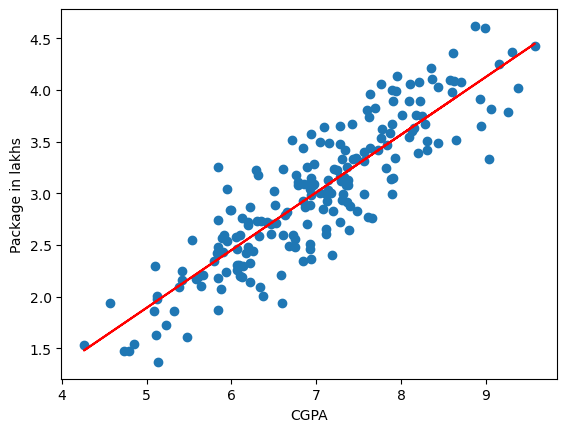

In [165]:
plt.scatter(x = df['cgpa'], y = df['package'])
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.xlabel('CGPA')
plt.ylabel('Package in lakhs')

In [166]:
# Note- now we have line, it means we also have slope of line and intercept of line also
m = lr.coef_ # this will give us line
b = lr.intercept_ # this will give intercept

In [167]:
# Equation of line => y = mx + b , m can refer as weight it means y depends mostly on m 

m * 8.58 + b # this is exactly same which we have calculated

array([3.89111601])

In [168]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error,r2_score

In [169]:
y_pred = lr.predict(X_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [170]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [171]:
print("MAE", mean_absolute_error(y_test,y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", root_mean_squared_error(y_test,y_pred))
print("R2_score", r2_score(y_test,y_pred))

MAE 0.2884710931878175
MSE 0.12129235313495527
RMSE 0.34827051717731616
R2_score 0.780730147510384


In [172]:
r2 = r2_score(y_test,y_pred)
X_test.shape

(40, 1)

In [173]:
# Adjusted r2_score
1- ((1-r2)*(40-1)/(40-1-1)) # here we can see R2_score as well as Adjusted R2_score both are same

0.7749598882343415

In [174]:
# Now we are randomly adding columns to check what effect will be there on R2_score and Adjusted R2_score

In [175]:
import numpy as np
# CASE- I => adding random feature
new_df1 = df
new_df1['random_feature'] = np.random.random(200) # here we have taken 200 because we have 200 rows
new_df1 = new_df1[['cgpa','random_feature','package']] # dataframe is already created in above step,
                                                       # here we are only rearranging the column 
new_df1

,cgpa,random_feature,package
0,6.89,0.974639,3.26
1,5.12,0.524493,1.98
2,7.82,0.876170,3.25
3,7.42,0.300787,3.67
4,6.94,0.924497,3.57
...,...,...,...
195,6.93,0.226407,2.46
196,5.89,0.033918,2.57
197,7.21,0.233696,3.24
198,7.63,0.777069,3.96


Text(0, 0.5, 'package')

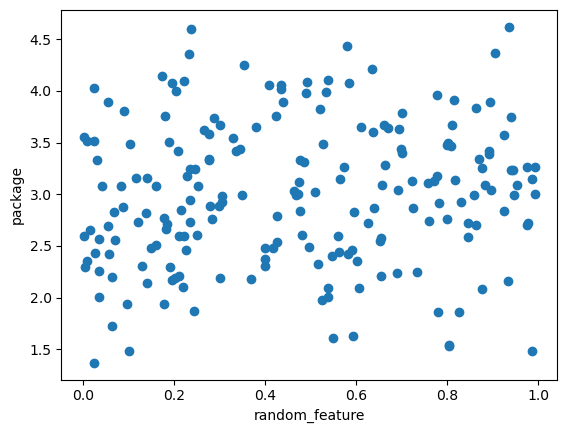

In [176]:
plt.scatter(x = new_df1['random_feature'], y = new_df1['package'])
plt.xlabel("random_feature")
plt.ylabel("package")

In [177]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1] 

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2, test_size=0.2)

In [179]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [180]:
y_pred = lr.predict(X_test)

In [181]:
r2 = r2_score(y_test,y_pred)
print("R2_score: ", r2)

R2_score:  0.7755932082632296


In [ ]:
# Adjusted R2_score
1 - ((1-r2)*(40-1)/(40-1-1)) 
# here we can see after adding one more column it does not affect r2_score at all

0.7696877663754199

In [185]:
# CASE -II => 
new_df2 = df
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)
new_df2 = new_df2[['cgpa', 'iq','package']]

In [186]:
new_df2.head()

,cgpa,iq,package
0,6.89,3.16,3.26
1,5.12,1.28,1.98
2,7.82,4.35,3.25
3,7.42,4.07,3.67
4,6.94,4.47,3.57


Text(0, 0.5, 'package')

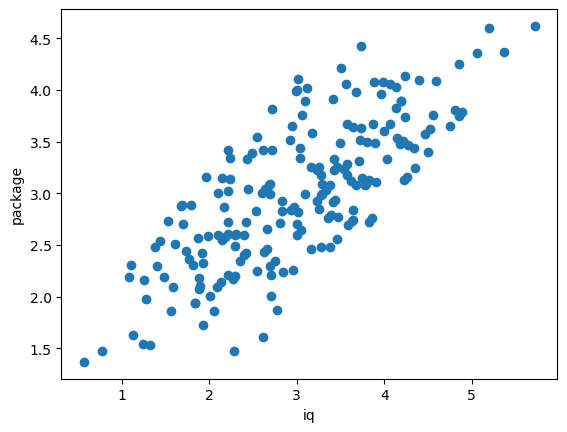

In [187]:
plt.scatter(x = new_df2['iq'], y = new_df2['package'])
plt.xlabel("iq")
plt.ylabel("package")

In [188]:
np.random.randint(-100,100)

49

In [195]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1] 

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2, test_size=0.2)

In [197]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [198]:
y_pred = lr.predict(X_test)

In [ ]:
r2 = r2_score(y_test,y_pred)
print("R2_score: ", r2) # here we can see r2_score increased 

R2_score:  0.8327423620874971


In [201]:
# Adjusted R2_score
1 - ((1-r2)*(40-1)/(40-1-1))  # also adjusted r2_score increased

0.8283408453003259